# Домашняя работа «Оценка точности модели, переобучение, регуляризация» обновленное

### **Задание**

#### **Цель:** закрепить знания о математическом смысле метрик TPR, FPR. Изучить построение ROC-кривой, графика Precision-Recall.

### Описание задания:
Решить задачу классификации при помощи обучения модели логистической регрессии. Качество модели оценивается путем подсчета метрик TPR, FPR и построения графиков ROC-кривой, Precision-Recall. Данные для обучения модели хранятся в файле athletes.csv, который можно найти в материалах к занятию.

**Этапы работы:**

1. Преобразуйте данные:<br>
a. проверьте наличие пропущенных значений. Преобразуйте/удалите пропуски по необходимости;<br>
b. закодируйте категориальные переменные числовыми значениями по необходимости.
2. Разделите выборку на обучающее (80% данных) и тестовое (20% данных) подмножества.
3. Постройте ROC-кривую с помощью функции sklearn.metrics. roc_curve.
4. Вычислите значение ROC-AUC метрики с помощью функции sklearn.metrics.roc_auc_score.
5. Реализуйте подсчет метрик TPR, FPR «вручную», без использования готовых функций из библиотеки sklearn.
6. Постройте ROC-кривую с помощью вычисленных в п. 5 метрик: объедините графики из п. 3 и п. 6 в один. Сравните, сделайте вывод.
7. Постройте график Precision-Recall, используя метрики, посчитанные в п. 5.
8. *Вычислите значение ROC-AUC метрики, используя метрики, посчитанные в п. 5.
9. Сформулируйте выводы по проделанной работе:
a. как по полученным графикам сделать вывод о качестве модели? Как вы оцениваете обученную модель исходя из подсчитанных метрик?
b. *может ли ROC-кривая проходить ниже диагонали?

**Результат:**
1. проведена оценка качества модели классификации;
2. реализован подсчет «вручную» основных метрик, проведено сравнение полученных результатов с готовыми функциями из библиотеки sklearn.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score, precision_score

In [3]:
sns.set_style(style = 'dark')
sns.set(font_scale=0.5)
sns.set(rc={'figure.figsize':(10,6)})

In [4]:
data = pd.read_csv('C:\\Users\\grebe\\Documents\\EDUCATION\\Машинное обучение фундаментальные инструменты и практики\\Работа с \
признаками и построение моделей\\Оценка точности модели, переобучение, регуляризация\\Additional_materials\\athletes.csv')

In [5]:
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [7]:
# удаляем строки с нулевыми значениями
for i in ['dob','height','weight']:
    data=data[~(data[i].isna())]

In [8]:
data = data.reset_index(drop=True)

Проверим категориальные переменные на наличие значений типа '?' и т.д.

In [9]:
data.nationality.unique()

array(['ESP', 'KOR', 'CAN', 'MDA', 'NZL', 'AUS', 'USA', 'ETH', 'BRN',
       'GBR', 'UZB', 'RSA', 'EGY', 'MAR', 'QAT', 'SUD', 'ALG', 'DEN',
       'NED', 'DJI', 'SEN', 'CMR', 'NIG', 'SWE', 'AFG', 'KSA', 'IOA',
       'RUS', 'IND', 'HUN', 'BDI', 'ERI', 'POL', 'BRA', 'GEO', 'CZE',
       'SEY', 'LTU', 'IRI', 'ROU', 'CUB', 'SLO', 'BAH', 'ITA', 'ARG',
       'PUR', 'FRA', 'RWA', 'TOG', 'TUN', 'ISR', 'NGR', 'LAT', 'JOR',
       'MAS', 'LIB', 'IRQ', 'TUR', 'VEN', 'JPN', 'TPE', 'KGZ', 'CHN',
       'MEX', 'GRE', 'IRL', 'KAZ', 'JAM', 'SUI', 'BAR', 'HON', 'ANG',
       'GER', 'COL', 'URU', 'AZE', 'MNE', 'SRB', 'BUL', 'FIN', 'UKR',
       'BLR', 'SMR', 'COK', 'AUT', 'BEL', 'SVK', 'POR', 'KEN', 'ECU',
       'LBA', 'UAE', 'NAM', 'GUY', 'EST', 'SKN', 'ARU', 'PAN', 'PER',
       'FIJ', 'GUI', 'ARM', 'THA', 'SIN', 'TKM', 'CRO', 'BIH', 'TGA',
       'MAW', 'DOM', 'GUA', 'MKD', 'TJK', 'CYP', 'CHI', 'MLT', 'ZIM',
       'TTO', 'TAN', 'CRC', 'BOL', 'BUR', 'ISL', 'HAI', 'ROT', 'MGL',
       'MAD', 'GAB',

In [10]:
data.sex.unique()

array(['male', 'female'], dtype=object)

In [11]:
data.sport.unique()

array(['athletics', 'fencing', 'taekwondo', 'cycling', 'triathlon',
       'volleyball', 'aquatics', 'rugby sevens', 'wrestling', 'football',
       'shooting', 'equestrian', 'rowing', 'judo', 'handball',
       'badminton', 'hockey', 'modern pentathlon', 'table tennis',
       'canoe', 'basketball', 'golf', 'archery', 'weightlifting',
       'sailing', 'tennis', 'gymnastics'], dtype=object)

### **Сформулируем задачу:**
**Научить модель определять по всем признакам кроме *id, name* получил или получит ли атлет медаль.** <br>
Колонку с датой рождения 
разобъём на несколько: месяц, день и год рождения. При этом год рождения может быть в 20 веке или в 21 веке, что учтём при 
выставлении финального года. Колонки с id и с name удалим из рассмотрения и добавим колонку с результатом 1, 
если была ли какая-либо медаль, и 0, если медали не было. 

Причина удаления колонок id, name: значения по ним или все уникальны (id) или более 99% (name) уникальны.

In [12]:
data.name.nunique()/data.shape[0]*100

99.83422361392522

In [13]:
data.id.nunique()/data.shape[0]*100

100.0

In [14]:
data = data.iloc[:,2:] # отсекли id, name columns

In [15]:
data['medal']=0

In [16]:
data.loc[data.gold+data.silver+data.bronze>0, 'medal']=1 # 1 is assigned if any medal was received

In [17]:
# разбили dob на отдельные колонки и перевели в формат int
data[['month', 'day', 'year']]=pd.DataFrame(data['dob'].str.split('/', expand=True).values.astype('int'),
             columns=['month', 'day', 'year'])

In [18]:
# Установили корректные числа для колонки year
data.year = data.year + 1900
data.loc[data.year<1924, 'year']=data.year+100

In [19]:
# удаляем ненужные для модели столбцы
del data['dob'], data['gold'],data['silver'],data['bronze']

In [20]:
data.head()

,nationality,sex,height,weight,sport,medal,month,day,year
0,ESP,male,1.72,64.0,athletics,0,10,17,1969
1,KOR,female,1.68,56.0,fencing,0,9,23,1986
2,CAN,male,1.98,79.0,athletics,1,5,27,1992
3,MDA,male,1.83,80.0,taekwondo,0,1,2,1991
4,NZL,male,1.81,71.0,cycling,0,11,26,1990


### Проанализируем данные:

In [21]:
data.medal.value_counts(normalize=True) # проверка сбалансированности классов

medal
0    0.838552
1    0.161448
Name: proportion, dtype: float64

Вывод: классы несбалансированные

In [22]:
data.groupby('medal').agg({'height':'mean','weight':'mean','year':'mean'})

,height,weight,year
medal,,,
0,1.763012,71.574300,1989.226579
1,1.787359,74.650314,1989.071877


Выводы:<br>
    1. Медалисты чуть выше и массивнее.<br>
    2. Год рождения примерно одинаковый как для медалистов, так и для не медалистов.

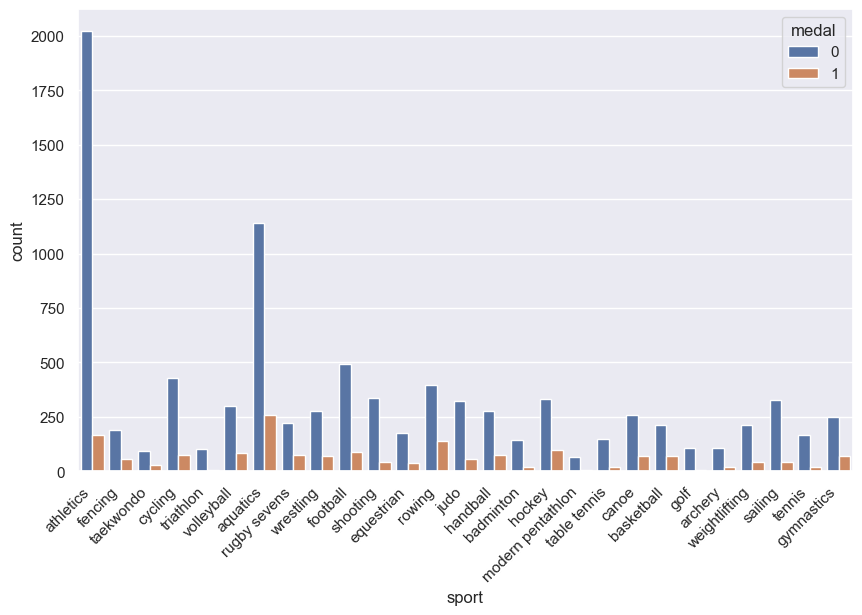

In [23]:
sns.countplot(x = data['sport'], hue=data.medal)
plt.xticks(rotation=45, ha='right')
plt.show()

#### Наблюдение: В 2 видах спорта особенно много спортсменов и полученных медалей (athletics, aquatics)

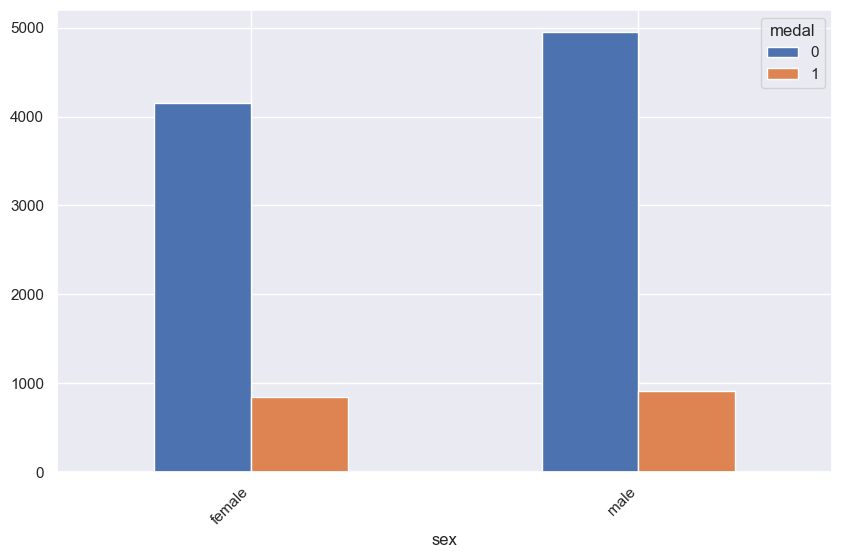

In [24]:
pd.crosstab(data.sex,data.medal).plot(kind='bar')
plt.xticks(rotation=45, ha='right')
plt.show()

##### Мужчин было немного больше в выборке чем женщин как и заработанных ими медалей.

#### Финальная подготовка данных:

In [25]:
y = pd.Series(data = data.medal) 

In [26]:
selected_columns = data[['nationality', 'sex', 'height', 'weight', 'sport', 'month', 'day','year']]

In [27]:
nominal_attributes = ['nationality', 'sex', 'sport']

In [28]:
X = pd.get_dummies(selected_columns, columns=nominal_attributes, drop_first=True, dtype = int)

In [29]:
X

,height,weight,month,day,year,nationality_ALB,nationality_ALG,nationality_AND,nationality_ANG,nationality_ANT,...,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
0,1.72,64.0,10,17,1969,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.68,56.0,9,23,1986,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.98,79.0,5,27,1992,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.83,80.0,1,2,1991,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1.81,71.0,11,26,1990,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10853,1.64,58.0,8,10,1995,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10854,1.73,63.0,12,19,1986,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10855,1.85,100.0,5,14,1991,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10856,1.60,56.0,4,5,1989,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Dataset is ready for applying logistic regression

In [30]:
model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=10000)
)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)
X_test.index

Index([5090, 8713, 4248,  805, 9207, 6460, 2691, 1708, 9114, 6825,
       ...
       2510, 3149, 9456, 1257, 8653, 8151, 5314,   98, 8240,  717],
      dtype='int64', length=3258)

In [32]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [33]:
predictions[:10]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [34]:
model.predict_proba(X_test)

array([[9.99627915e-01, 3.72085458e-04],
       [8.05053817e-01, 1.94946183e-01],
       [9.98951557e-01, 1.04844279e-03],
       ...,
       [9.73434719e-01, 2.65652807e-02],
       [9.80893831e-01, 1.91061688e-02],
       [7.30745786e-01, 2.69254214e-01]])

In [35]:
model.score(X_train, y_train)

0.8435526315789473

In [36]:
model.score(X_test, y_test)

0.8400859422958871

In [37]:
predictions_prob = model.predict_proba(X_test)

In [38]:
# получаем значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve(y_test, predictions_prob[:, 1])

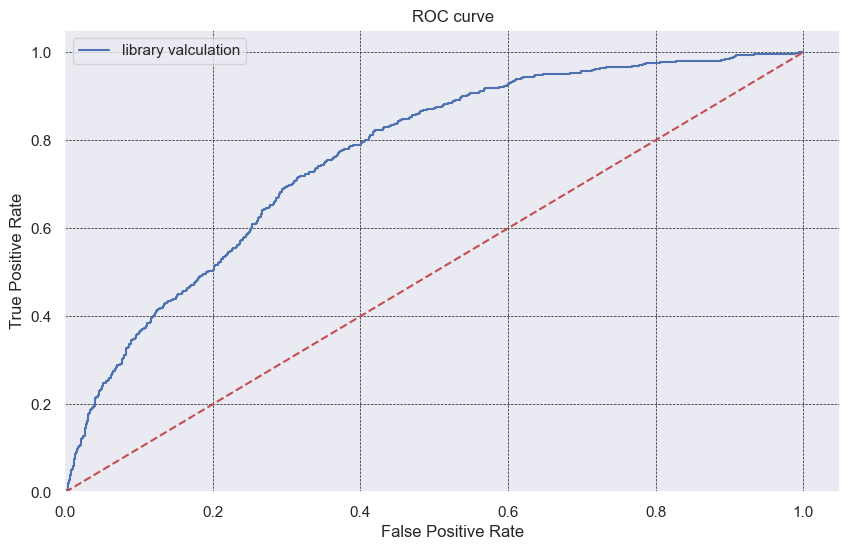

In [39]:
# Построение ROC-кривой с помощью функции sklearn.metrics. roc_curve
plt.plot(fpr, tpr, label='library valculation')
plt.grid(color='k', linestyle='--', linewidth=0.5)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc=0)
plt.show()

#### Подсчет метрик TPR, FPR «вручную», без использования готовых функций из библиотеки sklearn

#### Для начала рассчитаем для threshold = 0.5 и сравним с результатами библиотечных функций 

In [40]:
    tp = 0 # True positive
    fp = 0 # False positive
    fn = 0 # False negative
    tn = 0 # True negative

    #predictions = model.predict_proba(X_test)
    for predicted_prob, actual in zip(predictions_prob[:, 1], y_test):
        if predicted_prob >= 0.5:
            predicted = 1
        else:
            predicted = 0

        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1

        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1

In [41]:
tp, fp, fn, tn

(36, 33, 488, 2701)

In [42]:
# процент спортсменов в тестовой выборке с медалями
y_test.sum()/len(y_test)

0.16083486801718846

In [43]:
# какая точность получилась?
(tp + tn) / (tp + fp + fn + tn)

0.8400859422958871

In [44]:
recall = tp / (tp + fn)
recall

0.06870229007633588

In [45]:
precision = tp / (tp + fp)
precision

0.5217391304347826

In [46]:
pred = model.predict(X_test)

In [47]:
recall_score(y_test, pred)

0.06870229007633588

In [48]:
precision_score(y_test, pred)

0.5217391304347826

#### Вывод: В целом, расчёты совпали.

### Создадим функцию для последующих расчётов и построения графиков

In [49]:
def lr_metrics(pred_prob, y_t, threshold):
    tp = 0 # True positive
    fp = 0 # False positive
    fn = 0 # False negative
    tn = 0 # True negative

    #predictions = model.predict_proba(X_test)
    for predicted_prob, actual in zip(pred_prob[:, 1], y_t):
        if predicted_prob >= threshold:
            predicted = 1
        else:
            predicted = 0

        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1

        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1
    return tp, fp, fn, tn

In [50]:
lr_metrics(predictions_prob, y_test, 0.5)

(36, 33, 488, 2701)

#### Постройте ROC-кривую с помощью вычисленных в п. 5 метрик: объедините графики из п. 3 и п. 6 в один. Сравните, сделайте вывод.

In [51]:
# Считаем метрики сами
fpr_, tpr_, pre_, r =[],[],[], ()
for i in np.linspace(0,1,num=50):
    r = lr_metrics(predictions_prob, y_test, i)
    fpr_m=r[1]/(r[1]+r[3]) # fp/(fp+tn)
    tpr_m=r[0]/(r[0]+r[2]) # tp/(tp+fn) = recall
    if (r[0]+r[1])==0:
        pre_m=0
    else:
        pre_m=r[0]/(r[0]+r[1]) #precision = tp / (tp + fp)
    pre_.append(pre_m)
    fpr_.append(fpr_m)
    tpr_.append(tpr_m)

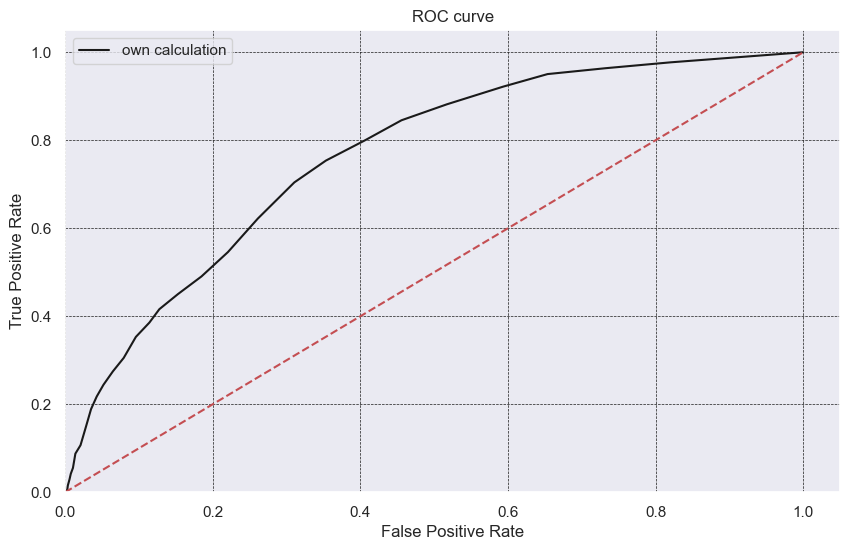

In [52]:
plt.plot(fpr_, tpr_, 'k', label = 'own calculation')
plt.grid(color='k', linestyle='--', linewidth=0.5)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc=0)
plt.show()

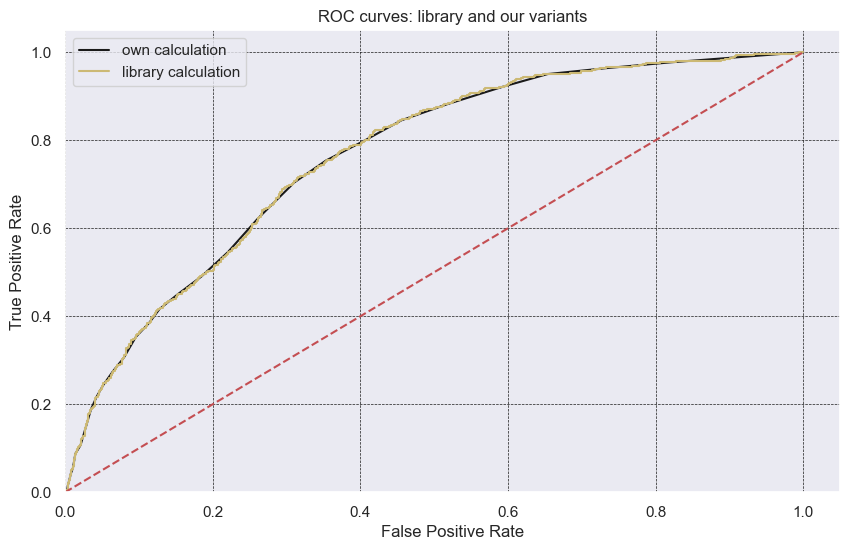

In [53]:
plt.plot(fpr_, tpr_, 'k', label ='own calculation')
plt.plot(fpr, tpr, 'y-', label ='library calculation')
plt.grid(color='k', linestyle='--', linewidth=0.5)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves: library and our variants')
plt.legend(loc=0)
plt.show()

### График Precision-Recall, используя метрики, посчитанные в п. 5

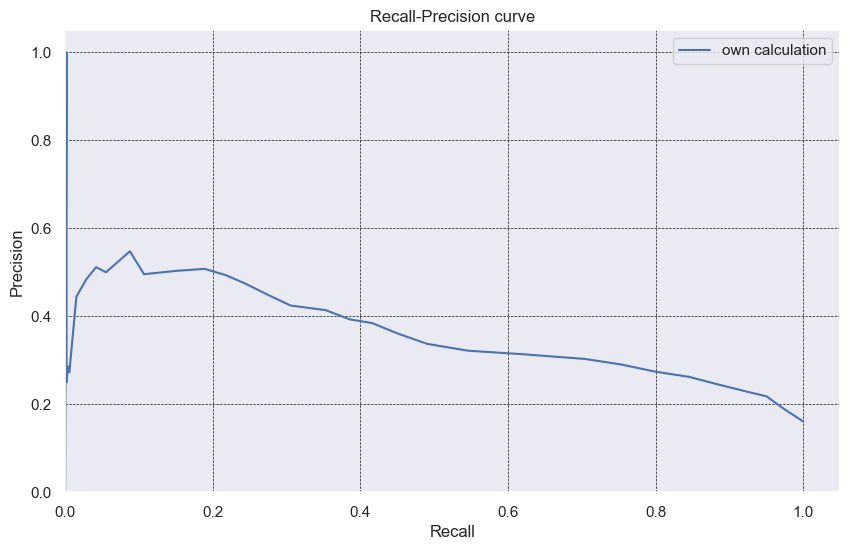

In [54]:
plt.plot(tpr_, pre_, label='own calculation')
plt.grid(color='k', linestyle='--', linewidth=0.5)
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Recall-Precision curve')
plt.legend(loc=0)
plt.show()

### *Вычислите значение ROC-AUC метрики, используя метрики, посчитанные в п. 5.

##### То есть считаем площадь под ROC-кривой при помощи суммы площадей маленьких прямоугольников, образованных разбивкой на интервалы

In [55]:
sq=0
for i in range(len(fpr_)-1):
    sq+=tpr_[i]*(-fpr_[i+1]+fpr_[i]) # поскольку fpr_ начинается с 1 и уменьшается, то меняем знак
sq

0.780306795400861

In [56]:
# проверка
roc_auc_score(y_test, predictions_prob[:, 1])

0.7629553208954807

##### Вывод: рассчитанная площадь с 50 интервалами примерно равна площади, рассчитанная программой из библиотеки

### **Выводы по проделанной работе:** <br>
a. как по полученным графикам сделать вывод о качестве модели? Как вы оцениваете обученную модель исходя из подсчитанных метрик?<br>
b. *может ли ROC-кривая проходить ниже диагонали?<br>

### **Выводы:**
1. Несмотря на высокую accuracy модель в таком виде не является достаточно точной, что подтверждается величинами метрик precision, recall и графиками.<br>
2. Причиной такого результата является несбалансированность выборки, где количество спортсменов с медалями значительно 
меньше чем количество спортсменов без медалей. Поэтому необходима регулиризация для окончательной проверки модели.
<br>


In [57]:
model_2 = make_pipeline(
    StandardScaler(),
    LogisticRegression(solver='liblinear', class_weight='balanced', max_iter=10000)
)

In [58]:
model_2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    solver='liblinear'))])

In [59]:
model_2.fit(X_train, y_train)
predictions_2 = model_2.predict(X_test)

In [60]:
from sklearn.metrics import accuracy_score

In [61]:
accuracy_2 = accuracy_score(y_test, predictions_2)
precision_2 = precision_score(y_test, predictions_2)
recall_2 = recall_score(y_test, predictions_2)

print(f"Accuracy_2 = {accuracy_2.round(4)}")
print(f"Precision_2 = {precision_2.round(4)}")
print(f"Recall_2 = {recall_2.round(4)}")

Accuracy_2 = 0.6639
Precision_2 = 0.2915
Recall_2 = 0.7615


In [62]:
model_2.score(X_train, y_train)

0.6690789473684211

### Окончательный вывод: Данных признаков недостаточно для надёжного выявления, что тот или иной спортсмен является медалистом.